<div style="background-color: gray; padding: 7px; text-align: center;">
    <h2>Projeto Estatística I | Análise Exploratória de Dados (EDA) em Python</h2>
</div>

**Motivação:** Gostaríamos de entender como a preparação prévia dos alunos se relaciona às notas alcançadas em testes de conhecimento em matemática, escrita e leitura.

**Hipótese:** Estudantes que completaram o curso de preparação para o teste têm notas maiores.

**``H0 (hipótese nula):``** A média das notas totais dos testes é igual para alunos que completaram e não completaram o curso.

*média notas com preparação = média notas sem preparação*

**``H1 (hipótese alternativa):``** A média das notas totais dos testes é diferente para alunos que completaram e não completaram o curso.

*média notas com preparação <> média notas sem preparação*

**Dados:**

``study_performance.csv``

| Colunas                     | Descrição                                      | Dtype  | Classificação        |
|-----------------------------|------------------------------------------------|--------|----------------------| 
| gender                      | Gênero do aluno                                | object | Qualitativa Nominal  |
| race_ethnicity              | Grupo étnico do aluno                          | object | Qualitativa Nominal  | 
| parental_level_of_education | Último nível de educação dos pais              | object | Qualitativa Ordinal  |
| lunch                       | Almoço antes do teste                          | object | Qualitativa Nominal  |
| test_preparation_course     | Finalização do curso preparatório para o teste | object | Qualitativa Nominal  |
| math_score                  | Nota em matemática                             | int64  | Quantitativa Discreta|
| reading_score               | Nota em leitura                                | int64  | Quantitativa Discreta|
| writing_score               | Nota em escrita                                | int64  | Quantitativa Discreta|

# Importando Bibliotecas e Módulos

In [58]:
# Bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Módulos
import funcoes_graficos as fns 

# Carregando Dados

In [ ]:
URL = 'https://raw.githubusercontent.com/tainahguerras/Estatistica-ADA-Santander/main/data/study_performance.csv?token=GHSAT0AAAAAACPQTJF2RXJM7QLNQAEEFDSKZQMSP6A'
data = pd.read_csv(URL)

# Exploração Inicial

In [ ]:
print('Forma do dataset:',data.shape)

In [ ]:
data.head()

In [ ]:
data.info()

### Checando valores faltantes

In [ ]:
data.isnull().sum() 

### Checando registros duplicados

In [ ]:
data.duplicated().sum() 

### Proporção das Variáveis Categóricas

In [ ]:
vars_cat = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']

print('Proporção das categorias, em %:\n')

for var in vars_cat:
    print(data[var].value_counts(True)*100, '\n')

### Descrição das Variáveis Quantitativas

In [60]:
def create_histogram(data, title = '', xlabel = '', ylabel = ''):
    
    sns.histplot(x=data, bins=20, kde=True, color='#8e7cc3')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

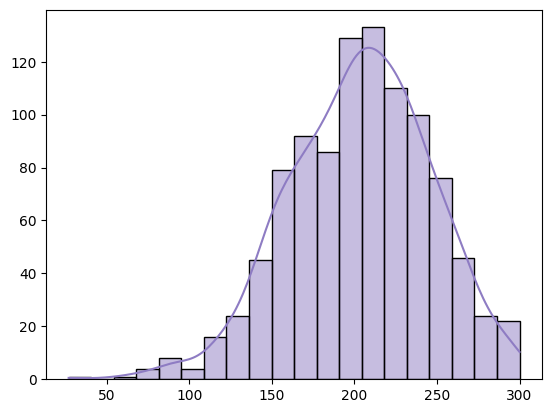

In [62]:
create_histogram(data=data['score_sum'])

In [ ]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('math scores')
sns.violinplot(x='math_score',data=data,color='purple',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('reading scores')
sns.violinplot(x='reading_score',data=data,color='red',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('writing scores')
sns.violinplot(x='writing_score',data=data,color='yellow',linewidth=3)
plt.show()

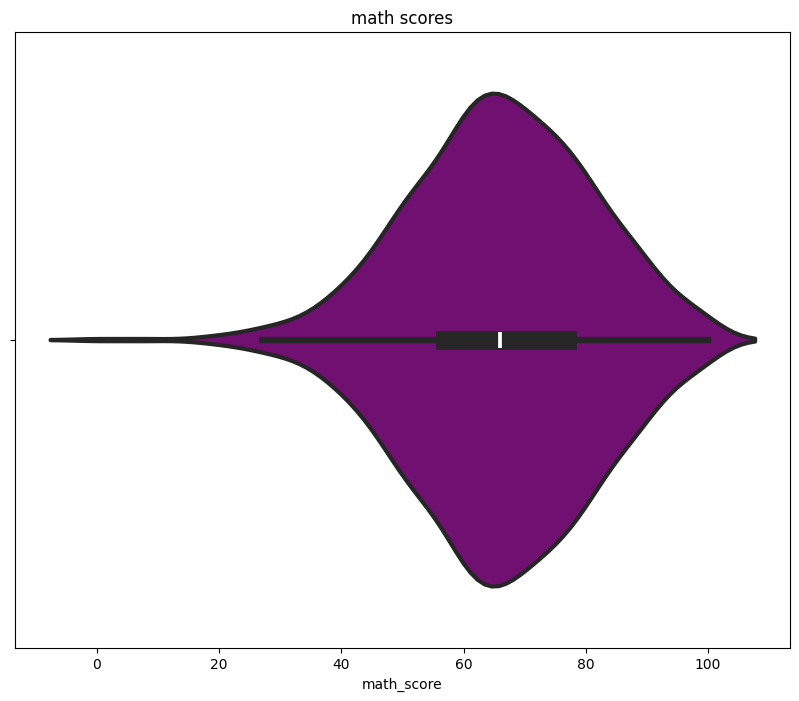

In [50]:
plt.figure(figsize=(10,8))
plt.title('math scores')
sns.violinplot(x='math_score',data=data,color='purple',linewidth=3)
plt.show()

Teste de Leitura

Teste de Escrita

Tentar entender outliers? O que fazer com eles?

Análises que podem ser feitas:
- Correlação entre variáveis categoricas e notas do teste separadamente
- Correlação entre variáveis categoricas e média das notas

    Formas de observar correlação:
    - Índices (Pearson, Spearman)
    - Gráficos de dispersão
    - Heatmaps (?) (não sei como funciona)

## Análise Hipótese

In [37]:
data['score_sum'] = data['math_score'] + data['reading_score'] + data['writing_score']
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,score_sum
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [45]:
from scipy import stats

In [46]:
normal_test = stats.normaltest(data.score_sum)
pvalue = normal_test.pvalue
if pvalue <= 0.05:
  print('Rejeitamos H0, ou seja, não é normal')
else:
  print('Aceitamos H0, ou seja, é normal')

Rejeitamos H0, ou seja, não é normal


In [63]:
data['test_preparation_course'] = data['test_preparation_course'].replace(['none', 'completed'], [0, 1])
data['test_preparation_course'] = data['test_preparation_course'].astype(int)

x = data[data['test_preparation_course'] == 0]['test_preparation_course']
y = data[data['test_preparation_course'] == 1]['test_preparation_course']

# ASSUMINDO NORMALIDADE
tstudent = stats.ttest_ind(x, y)
pvalue = tstudent.pvalue
print('p-value:', pvalue)

if pvalue <= 0.05:
  print('Rejeitamos H0, ou seja, valores de média são diferentes')
else:
  print('Aceitamos H0')

p-value: 0.0
Rejeitamos H0, ou seja, valores de média são diferentes


c:\Users\matme\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
